In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importing the dataset
column_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
               'class']
dataset = pd.read_csv('magic04.data', names=column_name)
dataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
#balance the dataset
dataset['class'].value_counts()


class
g    12332
h     6688
Name: count, dtype: int64

In [4]:
g = dataset.groupby('class')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
g

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  \
class                                                                    
g     0     12.7273  11.6358  2.1804  0.7129  0.3927 -15.5745   8.9228   
      1     44.5336  12.8520  2.5971  0.4147  0.2541 -35.9658 -11.9196   
      2     20.1393   7.3303  2.0394  0.7215  0.3973  -1.3678   7.9287   
      3     39.7201  18.5253  2.9222  0.2883  0.1740   4.6451  34.6454   
      4     33.7556  27.8646  3.0519  0.1837  0.0989  14.9282  -8.5632   
...             ...      ...     ...     ...     ...      ...      ...   
h     6683  49.7923  10.4327  2.9738  0.3579  0.1875  -0.5596  27.6367   
      6684  54.8547  12.4319  2.9284  0.2983  0.1539  10.8605  31.7523   
      6685  91.7180  75.6788  3.5625  0.2100  0.1247 -19.6040  59.6146   
      6686  29.5565   9.7677  2.6609  0.4943  0.2450  23.6265  15.0559   
      6687  46.5004  37.2673  2.7930  0.2540  0.1683  12.3916 -32.4707   

            fM3Trans   fAlpha     fDist class  
class                                          
g     0       9.5077  35.6940  204.8950     g  
      1      12.9971  13.0420  221.5550     g  
      2       5.4482  48.7460  113.8170     g  
      3      12.4572  10.5050  162.2080     g  
      4     -16.8618   8.8460  143.6180     g  
...              ...      ...       ...   ...  
h     6683   -5.1558  45.1940  157.4620     h  
      6684    9.4073  70.2890  247.6970     h  
      6685  -60.5589  53.5527  302.1030     h  
      6686  -13.8156  25.3811  121.8509     h  
      6687  -25.6942  80.6529  204.5836     h  

[13376 rows x 11 columns]

In [5]:
#splitting the dataset
X = g.iloc[:, :-1].values
y = g.iloc[:, -1].values

In [6]:
X

array([[ 12.7273,  11.6358,   2.1804, ...,   9.5077,  35.694 , 204.895 ],
       [ 44.5336,  12.852 ,   2.5971, ...,  12.9971,  13.042 , 221.555 ],
       [ 20.1393,   7.3303,   2.0394, ...,   5.4482,  48.746 , 113.817 ],
       ...,
       [ 91.718 ,  75.6788,   3.5625, ..., -60.5589,  53.5527, 302.103 ],
       [ 29.5565,   9.7677,   2.6609, ..., -13.8156,  25.3811, 121.8509],
       [ 46.5004,  37.2673,   2.793 , ..., -25.6942,  80.6529, 204.5836]])

In [7]:
y

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
y = e.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
#normalizing the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.94489483, -0.57738849, -1.3864604 , ...,  0.39953257,
         0.15091003,  0.12738862],
       [-0.26851949, -0.51907969, -0.51151302, ...,  0.54986586,
        -0.68921127,  0.34497304],
       [-0.7872753 , -0.78380892, -1.68251891, ...,  0.22463774,
         0.63498487, -1.0621164 ],
       ...,
       [ 0.73487808,  2.49305246,  1.51554289, ..., -2.61913614,
         0.81325659,  1.39695321],
       [-0.58701429, -0.66695161, -0.3775518 , ..., -0.60530163,
        -0.23157659, -0.95719134],
       [-0.2266946 ,  0.65147348, -0.10018067, ..., -1.11706556,
         1.8183535 ,  0.12332164]])

In [10]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=True)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.50, train_size=0.50,
                                                              random_state=True)

In [11]:
#fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
ypred = classifier.score(X_test, y_test)
print(ypred)


0.7852516193323368


In [12]:
#apply different values of k and choose the best one using cross validation
from sklearn.model_selection import GridSearchCV
KN = KNeighborsClassifier()
k_range = list(range(1, 26))
param_grid = dict(n_neighbors=k_range)
grid=GridSearchCV(KN,param_grid,cv=10,scoring='accuracy',return_train_score=True)
g=grid.fit(X_train,y_train)

In [13]:
#get the best value of k
print(grid.best_params_)
accuracy=grid.best_score_*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


{'n_neighbors': 11}
Accuracy for our training dataset with tuning is : 81.41%


In [14]:
knn=KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
y_test_pred=knn.predict(X_test)
test_accuracy=knn.score(X_test,y_test)
print(test_accuracy)

0.8016940707523668


[[868 108]
 [290 741]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       976
           1       0.87      0.72      0.79      1031

    accuracy                           0.80      2007
   macro avg       0.81      0.80      0.80      2007
weighted avg       0.81      0.80      0.80      2007


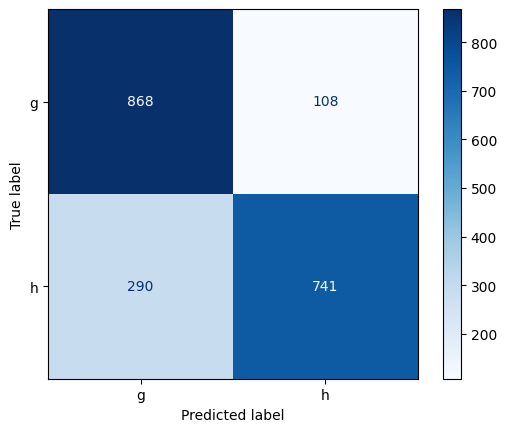

In [15]:
#plotting the confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_test_pred)
print(cm)
print(classification_report(y_test,y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['g','h'])
disp = disp.plot(cmap=plt.cm.Blues)

In [16]:
#compare the 
results = pd.DataFrame(g.cv_results_)
needed_results=results[['param_n_neighbors','mean_train_score','mean_test_score']]
needed_results

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.785434
1,2,0.872061,0.773256
2,3,0.895333,0.801880
3,4,0.855863,0.796327
4,5,0.864324,0.809142
5,6,0.844352,0.801667
6,7,0.851531,0.809036
7,8,0.837422,0.803696
8,9,0.844850,0.811921
9,10,0.836009,0.810959
